# Testes Não Paramétricos e Correlação

### Pacotes

In [1]:
import pandas as pd #pacote para manipulação de dados
import matplotlib.pyplot as plt # pacote para criar gráficos
import scipy.stats as spy
from numpy import std

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8) # define o tamanho padrão dos gráficos criados


### Importação dos Dados

In [2]:
path = r"D:\UFPR\2º Semestre 2021\Estatística Econômica e Introdução à Econometria\1. Relatório Enade\2018\3.DADOS\microdados_enade_2018.txt"
enade = pd.read_table(path, sep=';', decimal=',')

In [3]:
enade.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
0,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0
1,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
2,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0
3,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,4.0
4,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [3]:
enadeQ21 = enade.filter(['CO_GRUPO', 'QE_I21', 'NT_GER'])

In [4]:
enadeQ21.head()

,CO_GRUPO,QE_I21,NT_GER
0,1,A,42.8
1,1,A,59.3
2,1,B,60.9
3,1,A,25.0
4,1,B,42.4


# Médias e Medianas

In [29]:
enadeQ21['NT_GER'].mean() #Média da nota geral de todos os cursos de alunos que possuem pais com ensino superior(A) e sem ensino superior(B)

41.79012335796741

In [30]:
enadeQ21['NT_GER'].median() #Média da nota geral de todos os cursos de alunos que possuem pais com ensino superior(A) e sem ensino superior(B)

41.0

In [8]:
enadeQ21.where(enadeQ21.CO_GRUPO==13).groupby(['QE_I21','CO_GRUPO']).count() #Média da nota geral do curso de economia

,,NT_GER
QE_I21,CO_GRUPO,
A,13.0,6124
B,13.0,1900


In [8]:
enadeQ21.where(enadeQ21.CO_GRUPO==13).groupby('CO_GRUPO').median() #Mediana da nota geral do curso de economia

,NT_GER
CO_GRUPO,
13.0,37.2


In [9]:
enadeQ21.where((enadeQ21.CO_GRUPO == 13) & (enadeQ21.QE_I21 == 'A')).groupby('QE_I21').mean() #MÉDIA da nota geral do curso de economia de alunos que possuem pais COM ensino superior (A)

,CO_GRUPO,NT_GER
QE_I21,,
A,13.0,39.357903


In [10]:
enadeQ21.where((enadeQ21.CO_GRUPO == 13) & (enadeQ21.QE_I21 == 'B')).groupby('QE_I21').mean() #MÉDIA da nota geral do curso de economia de alunos que possuem pais SEM ensino superior (A)

,CO_GRUPO,NT_GER
QE_I21,,
B,13.0,35.401737


In [11]:
enadeQ21.where((enadeQ21.CO_GRUPO == 13) & (enadeQ21.QE_I21 == 'A')).groupby('QE_I21').median() #MEDIANA da nota geral do curso de economia de alunos que possuem pais COM ensino superior (A)

,CO_GRUPO,NT_GER
QE_I21,,
A,13.0,38.2


In [12]:
enadeQ21.where((enadeQ21.CO_GRUPO == 13) & (enadeQ21.QE_I21 == 'B')).groupby('QE_I21').median() #MEDIANA da nota geral do curso de economia de alunos que possuem pais SEM ensino superior (A)

,CO_GRUPO,NT_GER
QE_I21,,
B,13.0,34.3


desvio padrão

In [12]:
print(std(enadeQ21.where(enadeQ21.QE_I21 == 'A')['NT_GER'])) #Desvio Padrão Geral
print(std(enadeQ21.where(enadeQ21.QE_I21 == 'B')['NT_GER']))

14.658834918445478
13.623364628117802


In [13]:
print(std(enadeQ21.where((enadeQ21.CO_GRUPO == 13) & (enadeQ21.QE_I21 == 'A'))['NT_GER'])) # Desvio Padrão dos Cursos de Economia
print(std(enadeQ21.where((enadeQ21.CO_GRUPO == 13) & (enadeQ21.QE_I21 == 'B'))['NT_GER']))

13.289988076110406
12.107246726616625


In [26]:
print(std(enadeQ21['NT_GER']))

14.392320804145431


## Gráfico: Histograma da Nota Geral de Economia de Alunos Com Pais que Possuem e Não Possuem Ensino Superior

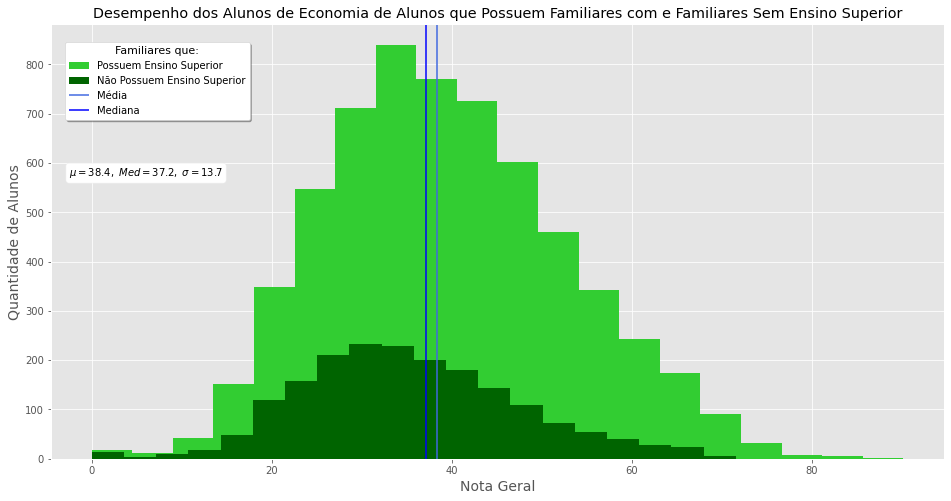

In [6]:
#Gráfico histograma do curso de economia (comparação com e sem ensino superior)
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.hist(enadeQ21.where((enadeQ21.CO_GRUPO == 13) & (enadeQ21.QE_I21 == 'A'))['NT_GER'], 
    bins=20, 
    label='Possuem Ensino Superior', 
    color='limegreen'
    )
ax.hist(enadeQ21.where((enadeQ21.CO_GRUPO == 13) & (enadeQ21.QE_I21 == 'B'))['NT_GER'], 
    bins=20, 
    label='Não Possuem Ensino Superior',
    color='darkgreen'
    )
ax.vlines([38.397424], 0, 1, transform=ax.get_xaxis_transform(), colors=['royalblue'], label='Média')
ax.vlines([37.2], 0, 1, transform=ax.get_xaxis_transform(), colors=['blue'], label='Mediana')
ax.set_title('Desempenho dos Alunos de Economia de Alunos que Possuem Familiares com e Familiares Sem Ensino Superior')
ax.set_xlabel('Nota Geral', size='14')
ax.set_ylabel('Quantidade de Alunos', size='14')
plt.legend(
    title='Familiares que:',
    title_fontsize=11,
    loc='upper left',
    ncol = 1,
    bbox_to_anchor=(0.01,0.97),
    frameon=True,
    facecolor='white',
    shadow=True,
    fontsize=10)
ax.text(0.02,
    0.65, 
    r'$\mu=38.4,\ Med=37.2,\ \sigma=13.7$', 
    transform=ax.transAxes, 
    fontsize=10, 
    bbox={'boxstyle':'round','facecolor':'white','alpha':1})
fig.savefig('Gráfico histograma do curso de economia (comparação familiar com e sem ensino superior).png')

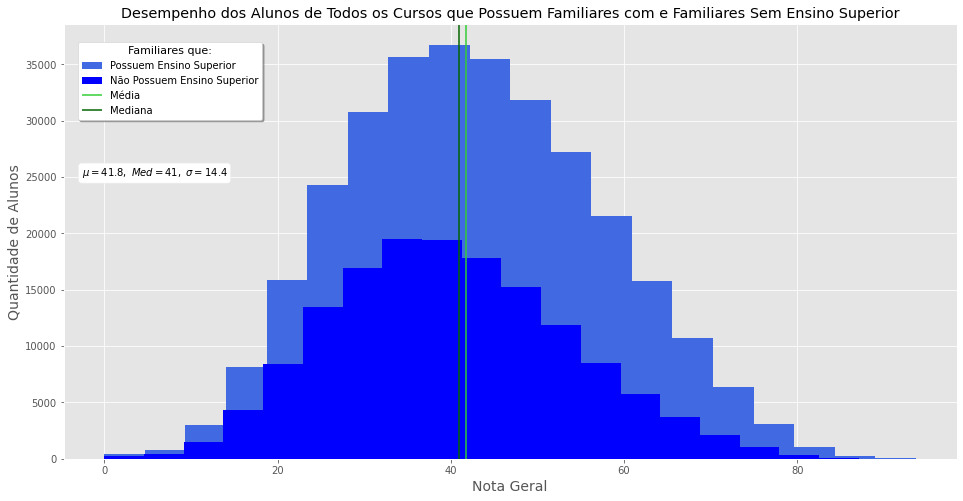

In [7]:
#Gráfico histograma do curso de economia (comparação com e sem ensino superior)
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.hist(enadeQ21.where(enadeQ21.QE_I21 == 'A')['NT_GER'], 
    bins=20, 
    label='Possuem Ensino Superior', 
    color='royalblue'
    )
ax.hist(enadeQ21.where(enadeQ21.QE_I21 == 'B')['NT_GER'], 
    bins=20, 
    label='Não Possuem Ensino Superior',
    color='blue'
    )
ax.vlines([41.8], 0, 1, transform=ax.get_xaxis_transform(), colors=['limegreen'], label='Média')
ax.vlines([41], 0, 1, transform=ax.get_xaxis_transform(), colors=['darkgreen'], label='Mediana')
ax.set_title('Desempenho dos Alunos de Todos os Cursos que Possuem Familiares com e Familiares Sem Ensino Superior')
ax.set_xlabel('Nota Geral', size='14')
ax.set_ylabel('Quantidade de Alunos', size='14')
plt.legend(
    title='Familiares que:',
    title_fontsize=11,
    loc='upper left',
    ncol = 1,
    bbox_to_anchor=(0.01,0.97),
    frameon=True,
    facecolor='white',
    shadow=True,
    fontsize=10)
ax.text(0.02, 
    0.65, 
    r'$\mu=41.8,\ Med=41,\ \sigma=14.4$', 
    transform=ax.transAxes, 
    fontsize=10, 
    bbox={'boxstyle':'round','facecolor':'white','alpha':1})
fig.savefig('Gráfico histograma todos os cursos(comparação com e sem ensino superior).png')

## Nota Geral Por Faixa de Renda

In [35]:
# Respostas do questionario renda familiar
qe_i08respostas = {
    "A" : "Até 1,5 salário mínimo (até R$ 1.431,00)",
    "B" : "De 1,5 a 3 salários mínimos (R$ 1.431,01 a R$ 2.862,00)",
    "C" : "De 3 a 4,5 salários mínimos (R$ 2.862,01 a R$ 4.293,00)",
    "D" : "De 4,5 a 6 salários mínimos (R$ 4.293,01 a R$ 5.724,00)",
    "E" : "De 6 a 10 salários mínimos (R$ 5.724,01 a R$ 9.540,00)",
    "F" : "De 10 a 30 salários mínimos (R$ 9.540,01 a R$ 28.620,00)",
    "G" : "Acima de 30 salários mínimos (mais de R$ 28.620,00)"
}

textoqi08 = ''
for key, value in qe_i08respostas.items():
    textoqi08=textoqi08 + '{k} : {v}\n'.format(k=key, v=value)

In [16]:
#substituição dos rótulos pela resposta do questionário
enadeQ21eQE_I08 = enade.filter(['CO_GRUPO', 'QE_I21', 'NT_GER','QE_I08']).dropna()
enadeQ21eQE_I08

#enadeQ21eQE_I08['QE_I08'] = [qe_i08respostas[resp] for resp in enadeQ21eQE_I08.QE_I08] #captura cada resposta da coluna Q001 e adiciona ao lado a resposta alternativa correspondente. 

,CO_GRUPO,QE_I21,NT_GER,QE_I08
0,1,A,42.8,C
1,1,A,59.3,D
2,1,B,60.9,E
3,1,A,25.0,D
4,1,B,42.4,E
...,...,...,...,...
548112,1,A,59.0,A
548114,1,A,47.8,C
548115,1,B,32.0,B
548117,1,A,32.8,F


In [17]:
enadeQ21eQE_I08.head()

,CO_GRUPO,QE_I21,NT_GER,QE_I08
0,1,A,42.8,C
1,1,A,59.3,D
2,1,B,60.9,E
3,1,A,25.0,D
4,1,B,42.4,E


In [18]:
#Média da nota geral dos alunos por faixa de renda
enadeQ21eQE_I08.filter(items=['QE_I08', 'NT_GER'])\
    .groupby('QE_I08')\
    .mean()\
    .sort_values(by='NT_GER', ascending=False)

,NT_GER
QE_I08,
F,48.379892
G,48.330459
E,45.393000
D,43.194903
C,41.523314
B,39.865974
A,39.041051


In [19]:
#Média da nota geral dos alunos do curso de economia por faixa de renda e escolaridade dos pais
enadeQ21eQE_I08.filter(items=['QE_I21', 'QE_I08', 'NT_GER']).where(enadeQ21eQE_I08.CO_GRUPO==13)\
    .groupby(['QE_I21','QE_I08'], as_index=True)\
    .mean()\
  

NT_GER
QE_I21 QE_I08           
A      A       35.471756
       B       35.639374
       C       36.686310
       D       38.210446
       E       40.619531
       F       44.191745
       G       46.038512
B      A       32.410552
       B       34.724231
       C       35.371963
       D       37.516742
       E       38.500495
       F       42.675000
       G       39.654545

### Gráfico de Linha da Nota Geral do Curso de Economia Por Faixa de Renda

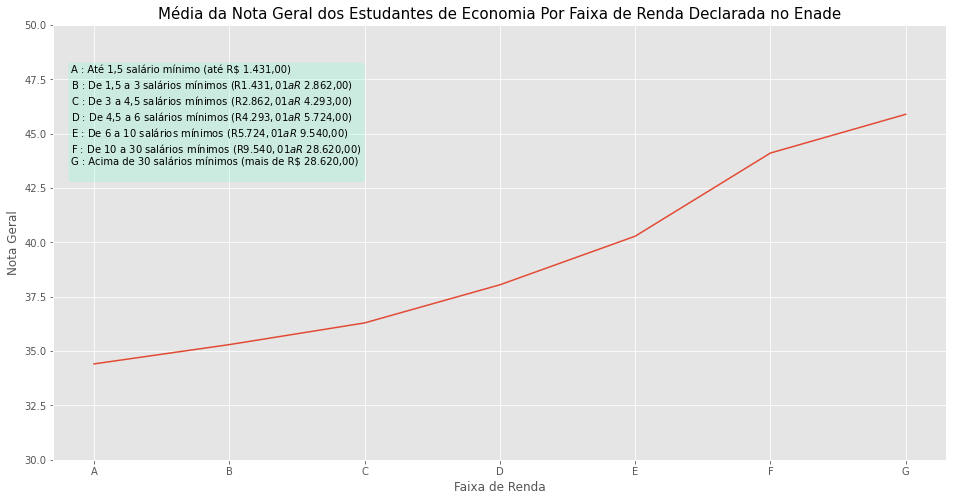

In [47]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(enadeQ21eQE_I08.filter(items=['QE_I08', 'NT_GER']).where(enadeQ21eQE_I08.CO_GRUPO==13)\
    .groupby('QE_I08', as_index=False)\
    .mean()\
    .sort_values(by='NT_GER', ascending=True)['QE_I08'],
    enadeQ21eQE_I08.filter(items=['QE_I08', 'NT_GER']).where(enadeQ21eQE_I08.CO_GRUPO==13)\
    .groupby('QE_I08', as_index=False)\
    .mean()\
    .sort_values(by='NT_GER', ascending=True)['NT_GER'])
plt.ylim(30, 50)
plt.xlabel('Faixa de Renda')
plt.ylabel('Nota Geral')
plt.title('Média da Nota Geral dos Estudantes de Economia Por Faixa de Renda Declarada no Enade', fontsize=15)
ax.text(0.02, 0.65, textoqi08, transform=ax.transAxes, fontsize=10, bbox={'boxstyle':'round','facecolor':'aquamarine','alpha':0.25})

plt.savefig('Média da Nota Geral dos Estudantes de Economia Por Faixa de Renda Declarada no Enade.png')

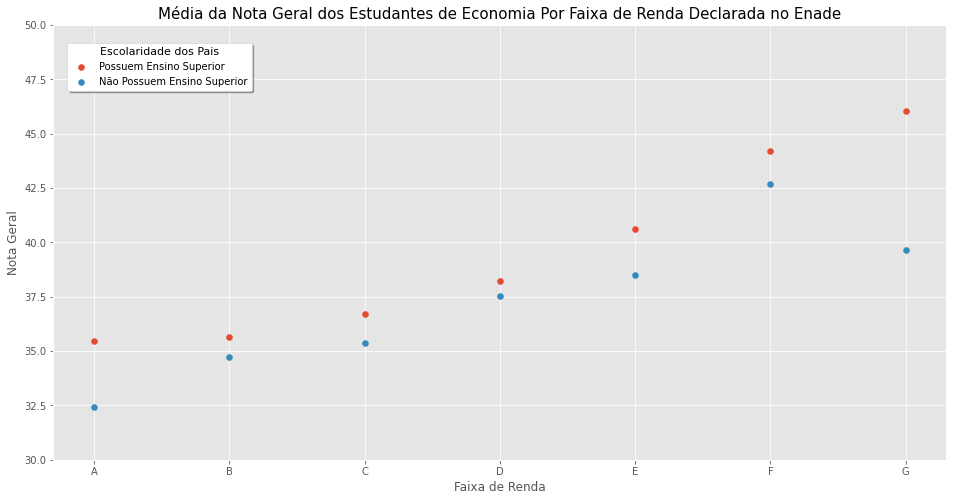

In [73]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.scatter(enadeQ21eQE_I08.where((enadeQ21eQE_I08.CO_GRUPO==13) & (enadeQ21eQE_I08.QE_I21=='A'))\
    .groupby('QE_I08', as_index=False)\
    .mean()\
    .sort_values(by='NT_GER', ascending=True)['QE_I08'],
    enadeQ21eQE_I08.where((enadeQ21eQE_I08.CO_GRUPO==13) & (enadeQ21eQE_I08.QE_I21=='A'))\
    .groupby('QE_I08', as_index=False)\
    .mean()\
    .sort_values(by='NT_GER', ascending=True)['NT_GER'],
    label='Possuem Ensino Superior')
ax.scatter(enadeQ21eQE_I08.where((enadeQ21eQE_I08.CO_GRUPO==13) & (enadeQ21eQE_I08.QE_I21=='B'))\
    .groupby('QE_I08', as_index=False)\
    .mean()\
    .sort_values(by='NT_GER', ascending=True)['QE_I08'],
    enadeQ21eQE_I08.where((enadeQ21eQE_I08.CO_GRUPO==13) & (enadeQ21eQE_I08.QE_I21=='B'))\
    .groupby('QE_I08', as_index=False)\
    .mean()\
    .sort_values(by='NT_GER', ascending=True)['NT_GER'],
    label='Não Possuem Ensino Superior')
plt.ylim(30, 50)
plt.xlabel('Faixa de Renda')
plt.legend(
    title='Escolaridade dos Pais',
    title_fontsize=11,
    loc='upper left',
    ncol = 1,
    bbox_to_anchor=(0.01,0.97),
    frameon=True,
    facecolor='white',
    shadow=True,
    fontsize=10)
plt.ylabel('Nota Geral')
plt.title('Média da Nota Geral dos Estudantes de Economia Por Faixa de Renda Declarada no Enade', fontsize=15)


plt.savefig('Média da Nota Geral dos Estudantes de Economia Por Faixa de Renda Declarada no Enade e Pais que Possuem Ensino Superior.png')

# gráfico: renda familiar e nota por renda

# Teste de Normalidade

In [ ]:
alpha = 0.05
k2, p = spy.normaltest(enadeQ21.where(enadeQ21.QE_I21 == 'A')['NT_GER'])

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal

if p < alpha:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")



Anderson-Darling Test

In [50]:
result = spy.anderson(enadeQ21.where(enadeQ21.QE_I21 == 'B')['NT_GER'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: nan
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


Teste wilcoxon-mann-whitney

In [53]:
stat, p = spy.mannwhitneyu(enadeQ21.where(enadeQ21.QE_I21 == 'A')['NT_GER'].dropna(), enadeQ21.where(enadeQ21.QE_I21 == 'B')['NT_GER'].dropna())
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Different distribution (reject H0)
